# Thực hiện quá trình dự báo trên mô hình ARIMA

## Thêm thư viện

In [1]:
import pandas as pd
import warnings
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from pmdarima.arima import auto_arima
from sklearn.preprocessing import StandardScaler
from sklearn.utils import column_or_1d
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')


## Nạp dữ liệu từ file csv

In [2]:
df_train = pd.read_csv("../../../Dataset/ethereum_train_9_1.csv", parse_dates=True,
                       index_col=0).drop(columns=['Close', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_train.index

df_close_train = df_train['Open'].values.copy().reshape(-1, 1)
df_train.head()


,Open
Date,
2020-06-01,0.23180
2020-06-02,0.24801
2020-06-03,0.23790
2020-06-04,0.24453
2020-06-05,0.24337


In [3]:
df_test = pd.read_csv("../../../Dataset/ethereum_test_9_1.csv", parse_dates=True,
                      index_col=0).drop(columns=['Close', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_test.index

df_close_test = df_test['Open'].values.copy().reshape(-1, 1)
df_test.head()


,Open
Date,
2022-03-21,2.86166
2022-03-22,2.89141
2022-03-23,2.96964
2022-03-24,3.03618
2022-03-25,3.11080


# Vẽ đồ thị

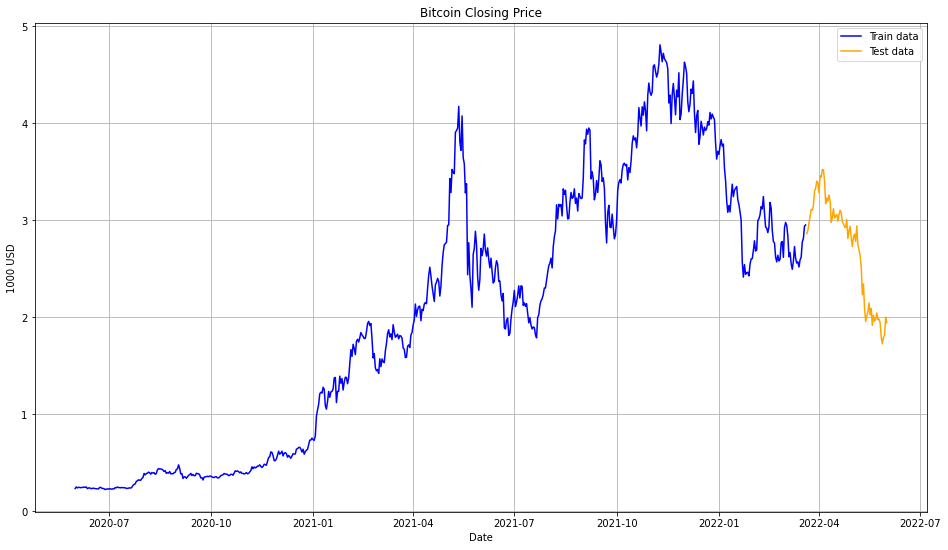

In [4]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Bitcoin Closing Price")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_train['Open'], 'blue', label='Train data')
plt.plot(df_test['Open'], 'orange', label='Test data')
plt.legend()


# Tách dữ liệu thành tập train và test

In [5]:
train_data, test_data = df_train, df_test
index_test = column_or_1d(df_test.index)
print(train_data.shape)
print(test_data.shape)


(658, 1)
(73, 1)


In [6]:
train_data

,Open
Date,
2020-06-01,0.23180
2020-06-02,0.24801
2020-06-03,0.23790
2020-06-04,0.24453
2020-06-05,0.24337
...,...
2022-03-16,2.61743
2022-03-17,2.77380
2022-03-18,2.81229


<h1>Xây dựng mô hình ARIMA để dự đoán giá Bitcoin theo chuỗi thời gian


In [7]:
warnings.filterwarnings('ignore')


def arima_model(ts_data):
    fit_model = auto_arima(ts_data, test='adf', seasonal=False, trace=True)
    return fit_model


In [8]:
fitted = arima_model(train_data)
fitted.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-915.554, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-908.772, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-912.203, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-912.059, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-910.002, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-908.579, Time=0.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-908.255, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-905.494, Time=0.98 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-922.782, Time=1.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-910.066, Time=0.53 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-917.929, Time=1.19 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-914.214, Time=1.21 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-913.876, Time=0.71 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-916.745, Time=1.29 sec
 ARIMA(2,1,3)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  658
Model:               SARIMAX(2, 1, 3)   Log Likelihood                 467.873
Date:                Sun, 26 Jun 2022   AIC                           -923.746
Time:                        15:10:11   BIC                           -896.820
Sample:                             0   HQIC                          -913.307
                                - 658                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8445      0.031    -59.382      0.000      -1.905      -1.784
ar.L2         -0.9227      0.029    -31.556      0.000      -0.980      -0.865
ma.L1          1.7807      0.041     43.842      0.000       1.701       1.860
ma.L2          0.8100      0.064     12.612      0.000       0.684       0.936
ma.L3         -0.0740      0.033     -2.229      0.026      -0.139      -0.009
sigma2         0.0142      0.000     32.124      0.000       0.013       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1349.68
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              37.73   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h1> Dự đoán trên tập test

In [9]:
pred = fitted.predict(len(test_data))
pred


array([2.96529502, 2.93921831, 2.97127993, 2.93620303, 2.97131919,
       2.93891294, 2.96628441, 2.94569926, 2.95841257, 2.95395717,
       2.9504442 , 2.96103523, 2.94474118, 2.96502345, 2.94264718,
       2.96520582, 2.94424302, 2.96209393, 2.94851047, 2.95709392,
       2.95379545, 2.95195927, 2.95838983, 2.94822271, 2.96104265,
       2.94677738, 2.96126075, 2.94770874, 2.95934155, 2.95038939,
       2.95616792, 2.95376973, 2.95286118, 2.95674996, 2.9504153 ,
       2.95851151, 2.94942297, 2.95871644, 2.94996064, 2.95753559,
       2.95164264, 2.95552269, 2.95380345, 2.95339436, 2.95573537,
       2.95179476, 2.95690323, 2.95111661, 2.95707647, 2.95142283,
       2.95635178, 2.95247699, 2.95507605, 2.95385741, 2.95370697,
       2.95510896, 2.95266174, 2.95588206, 2.9522002 , 2.95602002,
       2.95237162, 2.95557653, 2.95303147, 2.95476863, 2.95391281,
       2.95388845, 2.95472309, 2.95320604, 2.95523414, 2.95289307,
       2.95533986, 2.95298686, 2.95506931])

# Vẽ đồ thị cho tập test và kết quả dự đoán


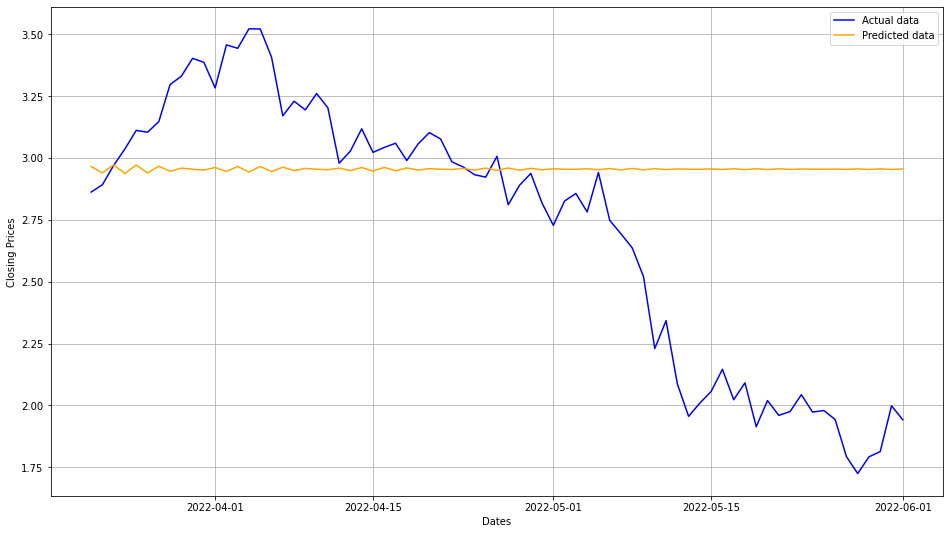

In [10]:
pred_series = pd.Series(pred, index=index_test)

plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_data, 'blue', label='Actual data')
plt.plot(pred_series, 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [11]:
mape = mean_absolute_percentage_error(test_data.values, pred_series.values)
mse = mean_squared_error(test_data.values, pred_series.values)
rmse = np.sqrt(mse)
r2 = r2_score(test_data.values, pred_series.values)

print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2*100:.2f}%")

MAPE: 19.74%
RMSE: 0.58
R2: -19.40%


# Tạo một DataFrame là 'df_pred' để lưu kết quả dự đoán trên mô hình ARIMA

In [12]:
df_pred = pd.DataFrame(index=index_test)
df_pred['actual'] = test_data.values
df_pred['arima'] = pred_series.values
df_pred['error'] = df_pred['actual'] - df_pred['arima']
df_pred


,actual,arima,error
2022-03-21,2.86166,2.965295,-0.103635
2022-03-22,2.89141,2.939218,-0.047808
2022-03-23,2.96964,2.971280,-0.001640
2022-03-24,3.03618,2.936203,0.099977
2022-03-25,3.11080,2.971319,0.139481
...,...,...,...
2022-05-28,1.72467,2.955234,-1.230564
2022-05-29,1.79225,2.952893,-1.160643
2022-05-30,1.81356,2.955340,-1.141780
2022-05-31,1.99846,2.952987,-0.954527


# Tạo thêm một DataFrame để tiến hành dự đoán sai số trên mô hình SVR

In [13]:
df_svr = df_pred.copy()
df_svr = df_svr.drop(columns=['actual', 'arima'])
timestamp = pd.to_datetime(df_svr.index).astype(np.int64) / 10**9
df_svr['timestamp'] = timestamp
df_svr.tail()

,error,timestamp
2022-05-28,-1.230564,1.653696e+09
2022-05-29,-1.160643,1.653782e+09
2022-05-30,-1.141780,1.653869e+09
2022-05-31,-0.954527,1.653955e+09
2022-06-01,-1.013259,1.654042e+09


In [14]:
svr_x_sc = StandardScaler()
svr_y_sc = StandardScaler()

x = df_svr.iloc[:, -1].values
y = df_svr.iloc[:, 0].values

x_scaled = svr_x_sc.fit_transform(x.reshape(-1, 1))
y_scaled = svr_y_sc.fit_transform(y.reshape(-1, 1))

print(x_scaled.shape)
print(y_scaled.shape)

(73, 1)
(73, 1)


<h1>Vẽ đồ thị thể hiện sai số

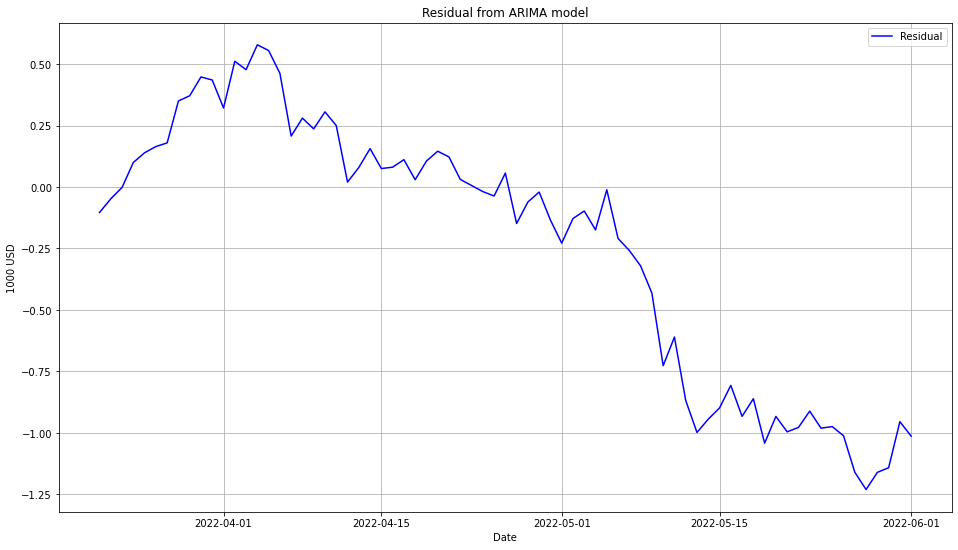

In [15]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Residual from ARIMA model")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_svr['error'], 'blue', label='Residual')
plt.legend()


## Hàm tạo hyperparameters

In [16]:
def para_range(minimum, maximum, step):
    para_list = np.arange(minimum, maximum, step)
    return para_list


def print_stats(hyperparams, stats):
    if(hyperparams[0] == 'poly'):
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}, degree={hyperparams[3]}')
    else:
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}')

    print(
        f"MSE={stats[0] :.2f} | RMSE={stats[1]:.2f}")


In [17]:
kernels = ['sigmoid', 'rbf', 'poly']
Cs = para_range(0.01, 0.2, 0.1)
gammas = para_range(0.1, 5, 0.1)
degrees = para_range(1, 6, 1)


## GridSearch để tìm hyperparameters phù hợp

In [18]:
warnings.filterwarnings('ignore')

stats_df = pd.DataFrame(
    columns=['kernel', 'C', 'gamma', 'degree',  'MSE', 'RMSE'])

# Sử dụng gird-seach để tìm hyperparameters phù hợp
for ker in kernels:
    # Nếu kernel == poly thì thực hiện chọn degree
    if(ker != 'poly'):
        for C in Cs:
            for gamma in gammas:
                rgs = SVR(kernel=ker, C=C, gamma=gamma, verbose=False)
                rgs.fit(x_scaled, y)
                pred = rgs.predict(x_scaled)

                # Đảo tỷ lệ thành giá trị thực
                inv_pred = svr_y_sc.inverse_transform(
                    column_or_1d(pred).reshape(-1, 1))
                inv_y = svr_y_sc.inverse_transform(
                    column_or_1d(y).reshape(-1, 1))

                # Đánh giá mô hình
                mse = mean_squared_error(inv_y, inv_pred)
                rmse = np.sqrt(mse)

                result = {'kernel': ker, 'C': C, 'gamma': gamma,
                          'degree': 0, 'MSE': mse, 'RMSE': rmse}

                hyperparam = [ker, C, gamma, 0]
                stats = [mse, rmse]
                stats_df = stats_df.append(result, ignore_index=True)
                print_stats(hyperparam, stats)
    else:
        for C in Cs:
            for gamma in gammas:
                for deg in degrees:
                    rgs = SVR(kernel=ker, C=C, gamma=gamma,
                              degree=deg, verbose=False)
                    rgs.fit(x_scaled, y)
                    pred = rgs.predict(x_scaled)

                    # Đảo tỷ lệ thành giá trị thực
                    inv_pred = svr_y_sc.inverse_transform(
                        column_or_1d(pred).reshape(-1, 1))
                    inv_y = svr_y_sc.inverse_transform(
                        column_or_1d(y).reshape(-1, 1))

                    # Đánh giá mô hình
                    mse = mean_squared_error(inv_y, inv_pred)
                    rmse = np.sqrt(mse)

                    hyperparam = [ker, C, gamma, deg]
                    stats = [mse, rmse]
                    result = {'kernel': ker, 'C': C, 'gamma': gamma, 'degree': deg,
                              'MSE': mse, 'RMSE': rmse}

                    stats_df = stats_df.append(result, ignore_index=True)

                    print_stats(hyperparam, stats)


SVR(kernel=sigmoid, C=0.01, gamma=0.1
MSE=0.07 | RMSE=0.27
SVR(kernel=sigmoid, C=0.01, gamma=0.2
MSE=0.06 | RMSE=0.25
SVR(kernel=sigmoid, C=0.01, gamma=0.30000000000000004
MSE=0.06 | RMSE=0.24
SVR(kernel=sigmoid, C=0.01, gamma=0.4
MSE=0.05 | RMSE=0.22
SVR(kernel=sigmoid, C=0.01, gamma=0.5
MSE=0.04 | RMSE=0.21
SVR(kernel=sigmoid, C=0.01, gamma=0.6
MSE=0.04 | RMSE=0.20
SVR(kernel=sigmoid, C=0.01, gamma=0.7000000000000001
MSE=0.04 | RMSE=0.20
SVR(kernel=sigmoid, C=0.01, gamma=0.8
MSE=0.04 | RMSE=0.19
SVR(kernel=sigmoid, C=0.01, gamma=0.9
MSE=0.03 | RMSE=0.19
SVR(kernel=sigmoid, C=0.01, gamma=1.0
MSE=0.03 | RMSE=0.18
SVR(kernel=sigmoid, C=0.01, gamma=1.1
MSE=0.03 | RMSE=0.19
SVR(kernel=sigmoid, C=0.01, gamma=1.2000000000000002
MSE=0.03 | RMSE=0.18
SVR(kernel=sigmoid, C=0.01, gamma=1.3000000000000003
MSE=0.03 | RMSE=0.18
SVR(kernel=sigmoid, C=0.01, gamma=1.4000000000000001
MSE=0.03 | RMSE=0.18
SVR(kernel=sigmoid, C=0.01, gamma=1.5000000000000002
MSE=0.03 | RMSE=0.18
SVR(kernel=sigmoid, C=0.

In [19]:
best_fit_model = stats_df[stats_df['RMSE'] == stats_df['RMSE'].min()].head(1)
best_fit_model


,kernel,C,gamma,degree,MSE,RMSE
174,rbf,0.11,2.8,0,0.003483,0.059014


# Xây dựng mô hình SVR với các tham số vừa tìm được

In [20]:
kernel = str(best_fit_model['kernel'].values[0])
C = float(best_fit_model['C'])
gamma = float(best_fit_model['gamma'])
degree = int(best_fit_model['degree'])

if(kernel == 'poly'):
    rgs = SVR(kernel=kernel, C=C, gamma=gamma, degree=degree)
else:
    rgs = SVR(kernel=kernel, C=C, gamma=gamma)

rgs.fit(x_scaled, y_scaled)
pred = rgs.predict(x_scaled)
pred

array([ 0.34611369,  0.40821165,  0.47288988,  0.5389117 ,  0.60487345,
        0.66925756,  0.73049706,  0.78704807,  0.83746593,  0.88047975,
        0.91506009,  0.94047493,  0.95632939,  0.96258602,  0.95956396,
        0.94791667,  0.92858976,  0.90276207,  0.87177429,  0.83705049,
        0.80001837,  0.76203378,  0.72431458,  0.68788786,  0.65355299,
        0.62186146,  0.59311294,  0.5673654 ,  0.54445644,  0.52403187,
        0.50557812,  0.48845483,  0.47192547,  0.45518432,  0.43737974,
        0.41763466,  0.39506576,  0.36880363,  0.33801555,  0.30193256,
        0.25988088,  0.21131716,  0.15586533,  0.09335215,  0.02383772,
       -0.05236297, -0.13467067, -0.22224736, -0.31401746, -0.40870428,
       -0.50487939, -0.60102119, -0.69557805, -0.78703065, -0.87394869,
       -0.95503765, -1.02917267, -1.09541825, -1.15303421, -1.20146965,
       -1.24034819, -1.26944818, -1.28868191, -1.29807725, -1.29776428,
       -1.28796839, -1.26900971, -1.24130777, -1.2053891 , -1.16

# Vẽ đồ thị

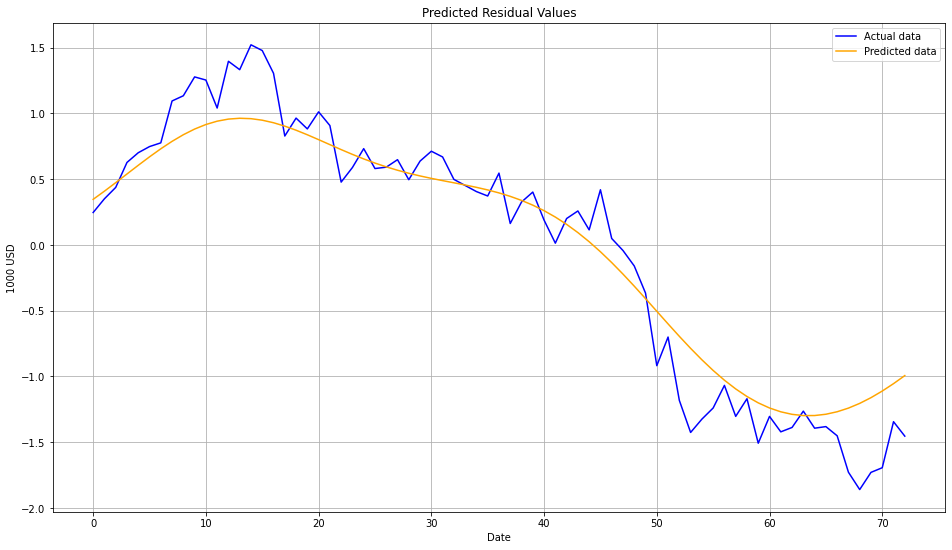

In [21]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Predicted Residual Values")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(column_or_1d(y_scaled), 'blue', label='Actual data')
plt.plot(column_or_1d(pred), 'orange', label='Predicted data')
plt.legend()


# Đưa giá trị về miền giá trị ban đầu

In [22]:
inv_pred = svr_y_sc.inverse_transform(pred.reshape(-1, 1))


In [23]:
df_pred['error_svr'] = inv_pred
df_pred['arima_svr'] = df_pred['arima'] + df_pred['error_svr']
df_pred.tail()

,actual,arima,error,error_svr,arima_svr
2022-05-28,1.72467,2.955234,-1.230564,-0.880042,2.075192
2022-05-29,1.79225,2.952893,-1.160643,-0.856776,2.096117
2022-05-30,1.81356,2.955340,-1.141780,-0.829864,2.125476
2022-05-31,1.99846,2.952987,-0.954527,-0.799776,2.153211
2022-06-01,1.94181,2.955069,-1.013259,-0.767041,2.188028


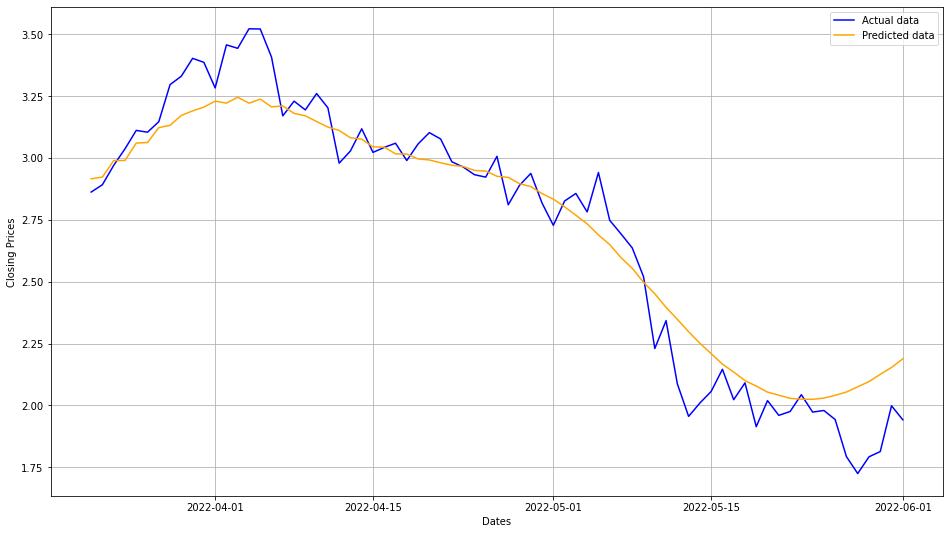

In [24]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_pred['actual'], 'blue', label='Actual data')
plt.plot(df_pred['arima_svr'], 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [25]:
mape = mean_absolute_percentage_error(df_pred['actual'].values, df_pred['arima_svr'].values)
mse = mean_squared_error(df_pred['actual'].values, df_pred['arima_svr'].values)
rmse = np.sqrt(mse)
r2 = r2_score(df_pred['actual'].values, df_pred['arima_svr'].values)

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"R-Squared: {r2:.2f}")


RMSE: 0.14
MAPE: 4.42%
R-Squared: 0.93
